# 分类分析实战

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score,classification_report
from sklearn.metrics import RocCurveDisplay

%matplotlib inline

In [80]:
'''数据集1：德国-银行客户信用风险数据'''
credit_data = pd.read_csv('german_credit_data.csv',index_col=0)

print(credit_data.info())
credit_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [3]:
'''数据预处理'''
print(credit_data.isnull().sum())

'''填充缺失值'''
freq_imp = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent')
svcnts_freq = freq_imp.fit_transform(credit_data['Saving accounts'].values.reshape(-1,1))
credit_data['Saving accounts'] = svcnts_freq
chkcnt_freq = freq_imp.fit_transform(credit_data['Checking account'].values.reshape(-1,1))
credit_data['Checking account'] = chkcnt_freq

print(credit_data.isnull().sum())
'''检查重复值'''
print(credit_data.duplicated().sum())

credit_data.head()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64
0


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
categ_indx = [1,3,4,5,8,9]
credit_data.iloc[:,categ_indx].astype('category').describe()

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
count,1000,1000,1000,1000,1000,1000
unique,2,3,4,3,8,2
top,male,own,little,little,car,good
freq,690,713,786,668,337,700


Text(0, 0.5, '持续期')

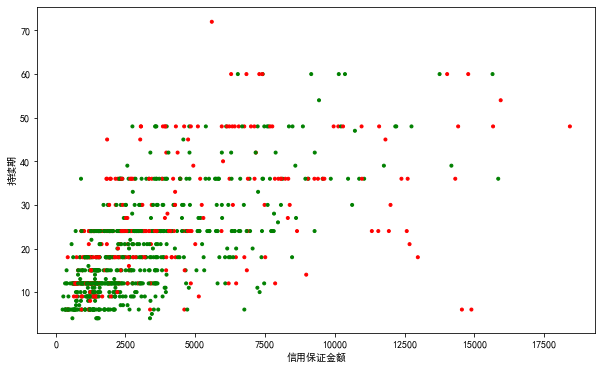

In [5]:
plt.rcParams['font.sans-serif']=['Simhei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10,6))

colvec = []
for i in range(credit_data.shape[0]):
    m = credit_data.Risk[i]
    if m=='good':
        colvec.append('green')
    if m=='bad':
        colvec.append('red')

plt.scatter(credit_data.loc[:,'Credit amount'],credit_data.loc[:,'Duration'],marker='.',c=colvec)
plt.xlabel('信用保证金额')
plt.ylabel('持续期')

Text(0, 0.5, '信用保证金额')

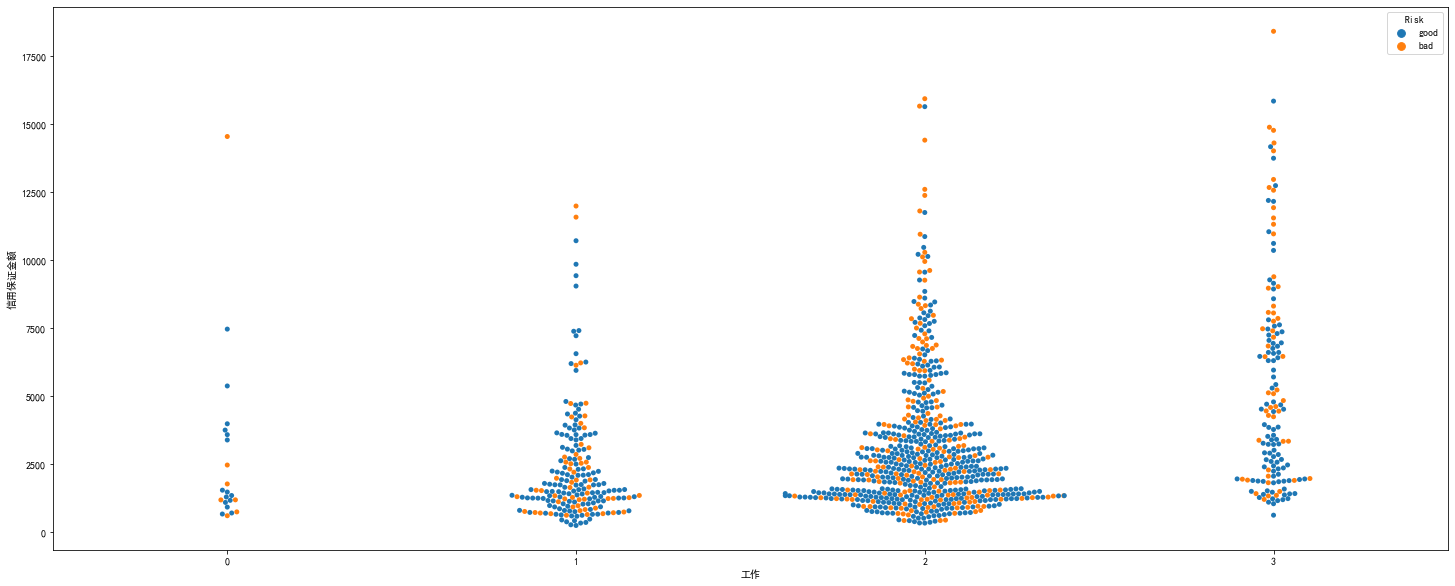

In [13]:
import seaborn as sns

plt.figure(figsize=(25,10))
sns.swarmplot(x='Job',y='Credit amount',hue = 'Risk',data = credit_data,size=5)
plt.xlabel('工作')
plt.ylabel('信用保证金额')
#catplot,stripplot,swarmplot

In [18]:
'''编码转换'''
trans_data = credit_data.iloc[:,categ_indx]
trans_data = trans_data.iloc[:,:-1]

for i in range(0,trans_data.shape[1]):
    print(trans_data.iloc[:,i].value_counts())

trans_data

male      690
female    310
Name: Sex, dtype: int64
own     713
rent    179
free    108
Name: Housing, dtype: int64
little        786
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64
little      668
moderate    269
rich         63
Name: Checking account, dtype: int64
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64


,Sex,Housing,Saving accounts,Checking account,Purpose
0,male,own,little,little,radio/TV
1,female,own,little,moderate,radio/TV
2,male,own,little,little,education
3,male,free,little,little,furniture/equipment
4,male,free,little,little,car
...,...,...,...,...,...
995,female,own,little,little,furniture/equipment
996,male,own,little,little,car
997,male,own,little,little,radio/TV
998,male,free,little,little,radio/TV


In [19]:
#ohenc = OneHotEncoder()
#trans_nord = ohenc.fit_transform(trans_data.iloc[:,[0,-1]])
##len(ohenc.get_feature_names_out())
#trans_nord = pd.DataFrame(trans_nord.toarray().astype('int'),columns=ohenc.get_feature_names_out())

trans_nord = pd.get_dummies(trans_data.iloc[:,[0,-1]])#drop_first = True
trans_nord

,Sex_female,Sex_male,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0
4,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,0,0,0
996,0,1,0,1,0,0,0,0,0,0
997,0,1,0,0,0,0,0,1,0,0
998,0,1,0,0,0,0,0,1,0,0


In [20]:
trans_data = trans_data.join(trans_nord)
#trans_data[trans_nord.columns] = trans_nord
trans_data.drop(columns = ['Sex','Purpose'],inplace=True)
trans_data

,Housing,Saving accounts,Checking account,Sex_female,Sex_male,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,own,little,little,0,1,0,0,0,0,0,1,0,0
1,own,little,moderate,1,0,0,0,0,0,0,1,0,0
2,own,little,little,0,1,0,0,0,1,0,0,0,0
3,free,little,little,0,1,0,0,0,0,1,0,0,0
4,free,little,little,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,own,little,little,1,0,0,0,0,0,1,0,0,0
996,own,little,little,0,1,0,1,0,0,0,0,0,0
997,own,little,little,0,1,0,0,0,0,0,1,0,0
998,free,little,little,0,1,0,0,0,0,0,1,0,0


In [21]:
scale_housing_map = {'own' : 2,'free' : 1,'rent' : 0}
trans_data.replace(scale_housing_map,inplace=True)
scale_saving = {'little':0,'moderate':1,'rich':2,'quite rich':3}
trans_data.replace(scale_saving,inplace=True)
scale_check = {'little':0,'moderate':1,'rich':2}
trans_data.replace(scale_check,inplace=True)
labenc = LabelEncoder()
trans_data['Risk'] = labenc.fit_transform(credit_data.Risk)
trans_data

,Housing,Saving accounts,Checking account,Sex_female,Sex_male,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
0,2,0,0,0,1,0,0,0,0,0,1,0,0,1
1,2,0,1,1,0,0,0,0,0,0,1,0,0,0
2,2,0,0,0,1,0,0,0,1,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,0,0,1,0,0,0,0,0,1,0,0,0,1
996,2,0,0,0,1,0,1,0,0,0,0,0,0,1
997,2,0,0,0,1,0,0,0,0,0,1,0,0,1
998,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [22]:
'''检查标签数据是否平衡'''
print(trans_data.Risk.value_counts())
'''处理不平衡数据'''
smot = SMOTE(random_state = 33)
X_smot,y_smot = smot.fit_resample(trans_data.iloc[:,0:-1],trans_data.Risk)
bal_risk_data = X_smot.copy()
bal_risk_data['Risk'] = y_smot
bal_risk_data

1    700
0    300
Name: Risk, dtype: int64


,Housing,Saving accounts,Checking account,Sex_female,Sex_male,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
0,2,0,0,0,1,0,0,0,0,0,1,0,0,1
1,2,0,1,1,0,0,0,0,0,0,1,0,0,0
2,2,0,0,0,1,0,0,0,1,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1,0,0,0,1,0,0,0,0,1,0,0,0,0
1396,1,0,1,0,1,1,0,0,0,0,0,0,0,0
1397,1,2,0,0,1,0,0,0,0,0,0,0,0,0
1398,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [24]:
x_train_risk,x_test_risk,y_train_risk,y_test_risk = train_test_split(bal_risk_data.iloc[:,:-1],bal_risk_data.Risk,\
                                                                    test_size=0.2,random_state=33)

In [25]:
'''数据集2：银行客户流失数据'''
bank_data = pd.read_csv('bank_churn.csv',index_col=0)
bank_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [26]:
print(bank_data.isnull().sum())
print(bank_data.duplicated().sum())

bank_data.drop(columns=['CustomerId','Surname'],inplace=True)
bank_data

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


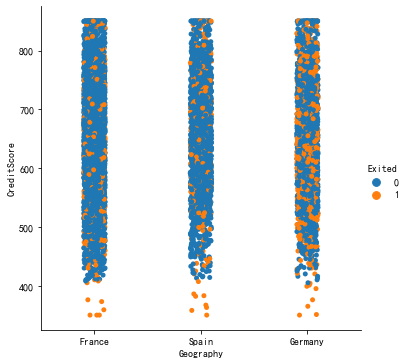

In [27]:
'''练习：使用seaborn的分类图功能画一下客户不同地区（或不同性别）及个体薪资（或CreditScore，balance）下
的流失情况Exited'''
import seaborn as sns
sns.catplot(x = 'Geography',y = 'CreditScore',hue = 'Exited',data=bank_data)
#sns.stripplot(x = 'CreditScore',y = 'EstimatedSalary',hue = 'Exited',data=bank_data)
#sns.swarmplot(x = 'CreditScore',y = 'EstimatedSalary',hue = 'Exited',data=bank_data)


In [28]:
print(bank_data.Geography.value_counts())
#ohenc = OneHotEncoder()
#tran2 = ohenc.fit_transform(bank_data.loc[:,['Geography','Gender']])
#bank_data[ohenc.get_feature_names_out()] = tran2.toarray()
#bank_data[ohenc.get_feature_names_out()] = bank_data[ohenc.get_feature_names_out()].astype('int')

bank_data = pd.get_dummies(bank_data.loc[:,['Geography','Gender']]).join(bank_data)
bank_data

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,,,,
1,1,0,0,1,0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,0,0,1,1,0,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,1,0,0,1,0,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,1,0,0,1,0,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,0,0,1,1,0,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,1,0,0,0,1,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,1,0,0,0,1,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,1,0,0,1,0,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [29]:
bank_data.drop(columns=['Geography','Gender'],inplace=True)
bank_data

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,,
1,1,0,0,1,0,619,42,2,0.00,1,1,1,101348.88,1
2,0,0,1,1,0,608,41,1,83807.86,1,0,1,112542.58,0
3,1,0,0,1,0,502,42,8,159660.80,3,1,0,113931.57,1
4,1,0,0,1,0,699,39,1,0.00,2,0,0,93826.63,0
5,0,0,1,1,0,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,1,0,0,0,1,771,39,5,0.00,2,1,0,96270.64,0
9997,1,0,0,0,1,516,35,10,57369.61,1,1,1,101699.77,0
9998,1,0,0,1,0,709,36,7,0.00,1,0,1,42085.58,1


In [30]:
bank_data2 = bank_data.copy()
print(bank_data2.Exited.value_counts())

X_smot2,y_smot2 = smot.fit_resample(bank_data2.iloc[:,:-1],bank_data2.Exited)
bank_data_fin = X_smot2
bank_data_fin['Churn'] = y_smot2
bank_data_fin

0    7963
1    2037
Name: Exited, dtype: int64


,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,0,0,1,0,619,42,2,0.000000,1,1,1,101348.880000,1
1,0,0,1,1,0,608,41,1,83807.860000,1,0,1,112542.580000,0
2,1,0,0,1,0,502,42,8,159660.800000,3,1,0,113931.570000,1
3,1,0,0,1,0,699,39,1,0.000000,2,0,0,93826.630000,0
4,0,0,1,1,0,850,43,2,125510.820000,1,1,1,79084.100000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,0,0,0,0,1,659,44,7,126935.944832,1,0,0,6534.221377,1
15922,0,1,0,0,0,589,39,4,117872.012168,2,0,0,6213.389686,1
15923,0,1,0,0,0,679,50,8,119143.927948,2,0,0,167245.831368,1
15924,0,0,0,0,0,617,49,6,160727.420641,1,1,0,98301.030342,1


In [32]:
print(bank_data_fin.info())
bank_data_fin.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15926 entries, 0 to 15925
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geography_France   15926 non-null  uint8  
 1   Geography_Germany  15926 non-null  uint8  
 2   Geography_Spain    15926 non-null  uint8  
 3   Gender_Female      15926 non-null  uint8  
 4   Gender_Male        15926 non-null  uint8  
 5   CreditScore        15926 non-null  int64  
 6   Age                15926 non-null  int64  
 7   Tenure             15926 non-null  int64  
 8   Balance            15926 non-null  float64
 9   NumOfProducts      15926 non-null  int64  
 10  HasCrCard          15926 non-null  int64  
 11  IsActiveMember     15926 non-null  int64  
 12  EstimatedSalary    15926 non-null  float64
 13  Churn              15926 non-null  int64  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 1.2 MB
None


,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000
mean,0.391498,0.249780,0.174432,0.403114,0.412972,647.726234,40.951714,4.841077,81572.016184,1.424149,0.625267,0.369773,100456.228561,0.500000
std,0.488101,0.432899,0.379492,0.490539,0.492383,91.886888,9.981968,2.723014,61599.450317,0.574818,0.484069,0.482758,57483.001246,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,585.000000,34.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51396.397500,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,649.000000,40.000000,5.000000,102926.702680,1.000000,1.000000,0.000000,100671.052761,0.500000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,711.000000,47.000000,7.000000,129130.671968,2.000000,1.000000,1.000000,149682.753035,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [33]:
'''数据转换'''
bank_data_fin.iloc[:,[5,6,8,12]] = MinMaxScaler(feature_range=(0,10)).fit_transform(bank_data_fin.iloc[:,[5,6,8,12]])
bank_data_fin


,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,0,0,1,0,5.38,3.243243,2,0.000000,1,1,1,5.067349,1
1,0,0,1,1,0,5.16,3.108108,1,3.340315,1,0,1,5.627087,0
2,1,0,0,1,0,3.04,3.243243,8,6.363572,3,1,0,5.696544,1
3,1,0,0,1,0,6.98,2.837838,1,0.000000,2,0,0,4.691201,0
4,0,0,1,1,0,10.00,3.378378,2,5.002462,1,1,1,3.954004,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,0,0,0,0,1,6.18,3.513514,7,5.059263,1,0,0,0.326163,1
15922,0,1,0,0,0,4.78,2.837838,4,4.698004,2,0,0,0.310120,1
15923,0,1,0,0,0,6.58,4.324324,8,4.748698,2,0,0,8.362511,1
15924,0,0,0,0,0,5.34,4.189189,6,6.406084,1,1,0,4.914942,1


In [34]:
x_train_churn,x_test_churn,y_train_churn,y_test_churn = train_test_split(bank_data_fin.iloc[:,:-1],bank_data_fin.Churn,\
                                                                        test_size = 0.2, random_state=22)

In [35]:
eval_res_risk = pd.DataFrame(columns=['算法模型','CV score','F1 score(Test)','Accuracy(Test)'])
eval_res_churn = pd.DataFrame(columns=['算法模型','CV score','F1 score(Test)','Accuracy(Test)'])

不平衡数据处理

- EasyEnsemble：https://blog.csdn.net/toby001111/article/details/123830434

- 更多参考：https://imbalanced-learn.org/stable/introduction.html


## 逻辑回归分析实战

In [36]:
'''德国-银行客户信用风险'''
logireg_risk = LogisticRegression()
logi_cvscore_risk = cross_val_score(logireg_risk,x_train_risk,y_train_risk,cv=5,scoring='accuracy')
print(logi_cvscore_risk)
logi_cvmean_risk = np.mean(logi_cvscore_risk)
print(logi_cvmean_risk)

[0.69642857 0.60714286 0.65178571 0.59375    0.53571429]
0.6169642857142856


In [37]:
logireg_risk.fit(x_train_risk,y_train_risk)
logi_ypred_risk = logireg_risk.predict(x_test_risk)
logipred_f1_risk = f1_score(y_test_risk,logi_ypred_risk)
print(logipred_f1_risk)
logipred_acc_risk = accuracy_score(y_test_risk,logi_ypred_risk)
print(logipred_acc_risk)
logipred_cfmat_risk = confusion_matrix(y_test_risk,logi_ypred_risk)
print(logipred_cfmat_risk)

logireg_risk_eval = classification_report(y_test_risk,logi_ypred_risk)
print(logireg_risk_eval)

eval_res_risk.loc[0] = ['逻辑回归',logi_cvmean_risk,logipred_f1_risk,logipred_acc_risk]

0.6096654275092936
0.625
[[93 42]
 [63 82]]
              precision    recall  f1-score   support

           0       0.60      0.69      0.64       135
           1       0.66      0.57      0.61       145

    accuracy                           0.62       280
   macro avg       0.63      0.63      0.62       280
weighted avg       0.63      0.62      0.62       280



#### 分类性能评分参考：
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [38]:
'''练习：使用逻辑回归模型分析客户流失'''
logireg_churn = LogisticRegression(max_iter=2000)
logi_cvscore_churn = cross_val_score(logireg_churn,x_train_churn,y_train_churn,cv=5,scoring='accuracy')
print(logi_cvscore_churn)
logi_cvmean_churn = np.mean(logi_cvscore_churn)
print(logi_cvmean_churn)

[0.83084772 0.8422292  0.84576138 0.82967033 0.8422292 ]
0.8381475667189953


In [39]:
logireg_churn.fit(x_train_churn,y_train_churn)
logi_ypred_churn = logireg_churn.predict(x_test_churn)
logipred_f1_churn = f1_score(y_test_churn,logi_ypred_churn)
print(logipred_f1_churn)
logipred_acc_churn = accuracy_score(y_test_churn,logi_ypred_churn)
print(logipred_acc_churn)
logipred_cfmat_churn = confusion_matrix(y_test_churn,logi_ypred_churn)
print(logipred_cfmat_churn)

logireg_churn_eval = classification_report(y_test_churn,logi_ypred_churn)
print(logireg_churn_eval)

eval_res_churn.loc[0] = ['逻辑回归',logi_cvmean_churn,logipred_f1_churn,logipred_acc_churn]

0.8230088495575222
0.8367859384808537
[[1457  162]
 [ 358 1209]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1619
           1       0.88      0.77      0.82      1567

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



In [40]:
pd.Series(logireg_churn.coef_[0].tolist(),index=x_test_churn.columns)
#练习：解释结果

Geography_France    -4.985306
Geography_Germany   -3.996505
Geography_Spain     -5.169338
Gender_Female       -4.675688
Gender_Male         -5.307322
CreditScore         -0.035099
Age                  0.587545
Tenure              -0.043463
Balance              0.007341
NumOfProducts       -0.310265
HasCrCard           -0.444005
IsActiveMember      -1.499817
EstimatedSalary      0.012771
dtype: float64

## K-邻近分类实战

In [41]:
'''德国-银行客户信用风险'''
knn_risk = KNeighborsClassifier(n_neighbors=10) #k=1,3,5,10
#help(KNeighborsClassifier)
knn_cvscore_risk = cross_val_score(knn_risk,x_train_risk,y_train_risk,cv=5,scoring='accuracy')
print(knn_cvscore_risk)
knn_cvmean_risk = np.mean(knn_cvscore_risk)
print(knn_cvmean_risk)


[0.64732143 0.60267857 0.64732143 0.63392857 0.55803571]
0.6178571428571429


In [42]:
knn_risk.fit(x_train_risk,y_train_risk)
knn_ypred_risk = knn_risk.predict(x_test_risk)
print('Test score(accuracy)',knn_risk.score(x_test_risk,y_test_risk))
knn_f1_risk = f1_score(y_test_risk,knn_ypred_risk)
print('F1 score:',knn_f1_risk)
knn_acc_risk = accuracy_score(y_test_risk,knn_ypred_risk)
print('Accuracy:',knn_acc_risk)
knn_cfmat_risk = confusion_matrix(y_test_risk,knn_ypred_risk)
print(knn_cfmat_risk)
knn_prec_risk = precision_score(y_test_risk,knn_ypred_risk)
print('Precision score:',knn_prec_risk)
knn_rec_risk = recall_score(y_test_risk,knn_ypred_risk)
print('Recall score:',knn_rec_risk)
knn_roc_risk = roc_auc_score(y_test_risk,knn_risk.predict_proba(x_test_risk)[:, 1])
print('ROC AUC score:',knn_roc_risk)

eval_res_risk.loc[1] = ['KNN',knn_cvmean_risk,knn_f1_risk,knn_acc_risk]

Test score(accuracy) 0.6428571428571429
F1 score: 0.5867768595041323
Accuracy: 0.6428571428571429
[[109  26]
 [ 74  71]]
Precision score: 0.7319587628865979
Recall score: 0.4896551724137931
ROC AUC score: 0.6662068965517242


![](https://i.loli.net/2018/10/30/5bd7b68769975.png)

[0.         0.         0.         0.1037037  0.15555556 0.19259259
 0.40740741 0.53333333 0.75555556 0.86666667 0.96296296 1.        ]
[0.         0.00689655 0.03448276 0.20689655 0.4        0.48965517
 0.60689655 0.77931034 0.88275862 0.94482759 0.99310345 1.        ]


Text(0, 0.5, 'True positive rate')

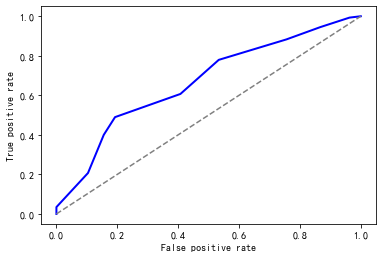

In [43]:
fpr,tpr,thred = roc_curve(y_test_risk,knn_risk.predict_proba(x_test_risk)[:,1],pos_label=1)
print(fpr)
print(tpr)
plt.plot(fpr,tpr,linewidth = 2,color='blue')
plt.plot([0,1],[0,1],linestyle='--',color='grey')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
#RocCurveDisplay.from_estimator(knn_risk,x_test_risk,y_test_risk)

#### 更多ROC曲线解释参考：
https://zhuanlan.zhihu.com/p/32824418

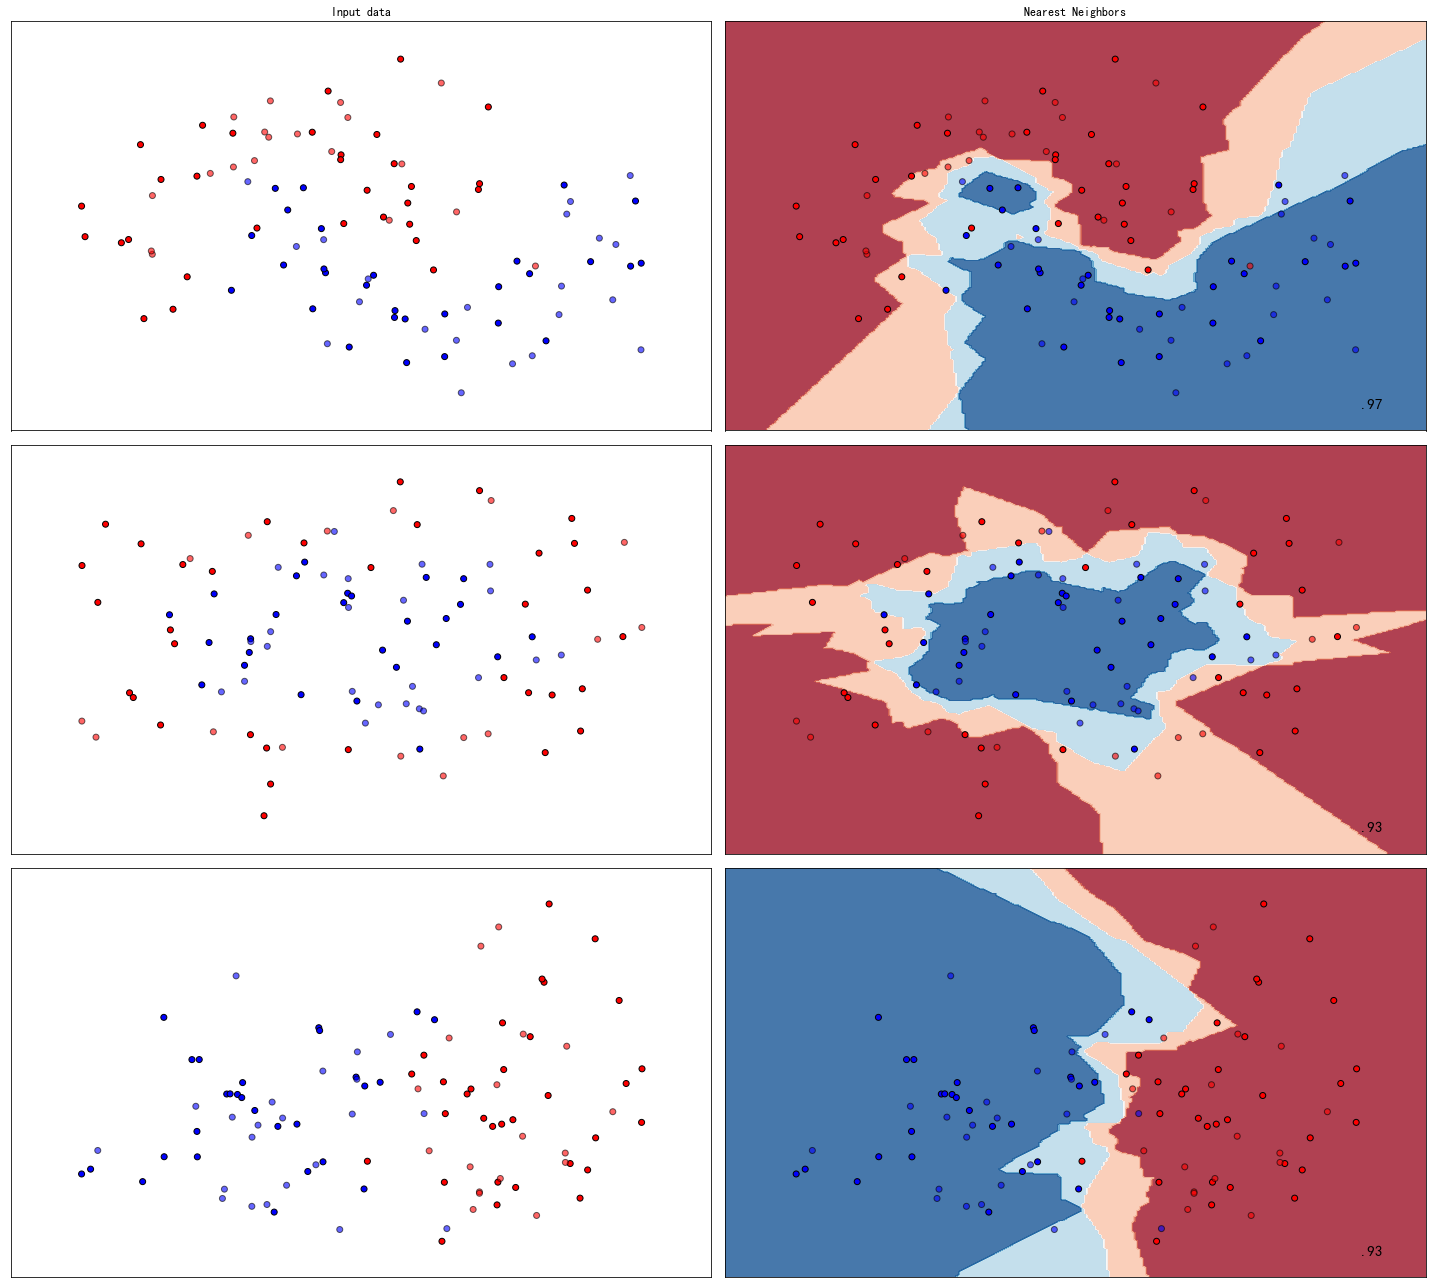

In [44]:
'''决策边界可视化'''
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification

'''step size in the mesh'''
h = 0.02

names = [
    "Nearest Neighbors"
]

classifiers = [
    KNeighborsClassifier(3)
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(20, 18))
i = 1
'''iterate over datasets'''
for ds_cnt, ds in enumerate(datasets):
    '''preprocess dataset, split into training and test part'''
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    '''第一列figure：plot the dataset first'''
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    '''Plot the training points'''
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    '''Plot the testing points'''
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    '''iterate over classifiers'''
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        '''第2+列figure：Plot the decision boundary of each estimator'''
        '''point in the mesh [x_min, x_max]x[y_min, y_max]'''
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        '''Put the result into a color plot'''
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
        #ax.contour(xx, yy, Z, cmap=plt.cm.Spectral)

        '''Plot the training points'''
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        '''Plot the testing points'''
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

更多参考：

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

In [45]:
'''练习：使用KNN分析客户流失'''
knn_churn = KNeighborsClassifier()
pargird = [{'n_neighbors':np.arange(1,50)}]
grid_sear = GridSearchCV(knn_churn,param_grid=pargird,cv=5,scoring='accuracy')
grid_sear.fit(x_train_churn,y_train_churn)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}],
             scoring='accuracy')

In [46]:
print(grid_sear.best_params_)
print(grid_sear.best_score_)

{'n_neighbors': 4}
0.8384615384615385


In [47]:
knn_cvmean_churn = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=4),x_train_churn,y_train_churn,cv=5))
print(knn_cvmean_churn)
knn_ypred_churn = grid_sear.predict(x_test_churn)
knn_f1_churn = f1_score(y_test_churn,knn_ypred_churn)
print(knn_f1_churn)
knn_acc_churn = accuracy_score(y_test_churn,knn_ypred_churn)
print(knn_acc_churn)

eval_res_churn.loc[1] = ['KNN',knn_cvmean_churn,knn_f1_churn,knn_acc_churn]

0.8384615384615385
0.8453341943816596
0.849654739485248


In [ ]:
#可选练习：KNN实现from scractch
#可以使用scipy.spatial.distance中的距离函数计算点之间的距离矩阵，排序后选k个邻居，
#根据邻居的标签实现majority voting

## 线性和二次判别分类实战

In [48]:
'''特征collinearity处理'''
chkdata_risk = bal_risk_data.iloc[:,:-1]
chkdata_risk.drop(columns = ['Sex_female','Purpose_business'],inplace = True)
chkdata_risk['const'] = 1
vif_risk = pd.Series([variance_inflation_factor(chkdata_risk.values,i) for i in range(chkdata_risk.shape[1])],index=chkdata_risk.columns)
vif_risk

Housing                         1.079287
Saving accounts                 1.015510
Checking account                1.018052
Sex_male                        1.068992
Purpose_car                     2.386168
Purpose_domestic appliances     1.076045
Purpose_education               1.393660
Purpose_furniture/equipment     2.021104
Purpose_radio/TV                2.177025
Purpose_repairs                 1.139154
Purpose_vacation/others         1.074177
const                          13.437223
dtype: float64

方差膨胀因子与共线性，更多参考：
https://zhuanlan.zhihu.com/p/435430759

In [49]:
chkdata_risk.drop(columns = chkdata_risk.columns.values[vif_risk.values>=5].tolist(),inplace=True)
chkdata_risk

,Housing,Saving accounts,Checking account,Sex_male,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,2,0,0,1,0,0,0,0,1,0,0
1,2,0,1,0,0,0,0,0,1,0,0
2,2,0,0,1,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,1,0,0,0
4,1,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1395,1,0,0,1,0,0,0,1,0,0,0
1396,1,0,1,1,0,0,0,0,0,0,0
1397,1,2,0,1,0,0,0,0,0,0,0
1398,0,0,0,0,0,0,0,0,0,0,0


In [50]:
x_train_risk_nc,x_test_risk_nc,y_train_risk_nc,y_test_risk_nc = train_test_split(chkdata_risk,bal_risk_data.Risk,\
                                                                                test_size=0.2,random_state=44)

In [51]:
'''德国-银行客户信用风险'''
lda_risk = LinearDiscriminantAnalysis()
lda_cvscore_risk = cross_val_score(lda_risk,x_train_risk,y_train_risk,cv=5,scoring='accuracy')
print(lda_cvscore_risk)
lda_cvmean_risk = np.mean(lda_cvscore_risk)
print(lda_cvmean_risk)

'''需注意特征间多重线性关系的影响 vif'''
qda_risk = QuadraticDiscriminantAnalysis()
qda_cvscore_risk = cross_val_score(qda_risk,x_train_risk_nc,y_train_risk_nc,cv=5,scoring='accuracy')
print(qda_cvscore_risk)
qda_cvmean_risk = np.mean(qda_cvscore_risk)
print(qda_cvmean_risk)

[0.6875     0.60714286 0.59821429 0.60714286 0.53571429]
0.6071428571428571
[0.58928571 0.66071429 0.63392857 0.56696429 0.52678571]
0.5955357142857143


In [52]:
lda_risk.fit(x_train_risk,y_train_risk)
#lda_risk.decision_function(x_test_risk)
lda_ypred_risk = lda_risk.predict(x_test_risk)
print('Test score(accuracy)',lda_risk.score(x_test_risk,y_test_risk))
lda_f1_risk = f1_score(y_test_risk,lda_ypred_risk)
print('F1 score:',lda_f1_risk)
lda_acc_risk = accuracy_score(y_test_risk,lda_ypred_risk)
lda_cfmat_risk = confusion_matrix(y_test_risk,lda_ypred_risk)
print(lda_cfmat_risk)
lda_roc_risk = roc_auc_score(y_test_risk,lda_risk.predict_proba(x_test_risk)[:, 1])
print('ROC AUC score:',lda_roc_risk)

eval_res_risk.loc[2] = ['LDA',lda_cvmean_risk,lda_f1_risk,lda_acc_risk]
#可选练习：评估QDA模型的性能

Test score(accuracy) 0.6035714285714285
F1 score: 0.5612648221343873
[[98 37]
 [74 71]]
ROC AUC score: 0.670779054916986


In [54]:
'''练习：使用LDA和QDA分析客户流失'''
lda_churn = LinearDiscriminantAnalysis()
lda_cvscore_churn = cross_val_score(lda_churn,x_train_churn,y_train_churn,cv=5,scoring='accuracy')
print('CV score:',lda_cvscore_churn)
lda_cvmean_churn = np.mean(lda_cvscore_churn)
print('CV mean:',lda_cvmean_churn)

lda_churn.fit(x_train_churn,y_train_churn)
lda_ypred_churn = lda_churn.predict(x_test_churn)
ldapred_f1_churn = f1_score(y_test_churn,lda_ypred_churn)
print('F1 score:',ldapred_f1_churn)
ldapred_acc_churn = accuracy_score(y_test_churn,lda_ypred_churn)
print('Accuracy:',ldapred_acc_churn)

eval_res_churn.loc[2] = ['LDA',lda_cvmean_churn,ldapred_f1_churn,ldapred_acc_churn]
#https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

CV score: [0.82927786 0.83830455 0.84144427 0.82849294 0.83751962]
CV mean: 0.8350078492935635
F1 score: 0.8216364258815474
Accuracy: 0.8364720652856246


## 朴素贝叶斯分类实战

In [55]:
'''德国-银行客户信用风险'''
from sklearn.naive_bayes import BernoulliNB
nb_risk = BernoulliNB() #特征的先验为多项式分布MultinomialNB或高斯分布GaussianNB'''
nb_cvscore_risk = cross_val_score(nb_risk,x_train_risk,y_train_risk,cv=5,scoring='accuracy')
print(nb_cvscore_risk)
nb_cvmean_risk = np.mean(nb_cvscore_risk)
print(nb_cvmean_risk)

[0.65178571 0.60714286 0.61160714 0.62053571 0.51785714]
0.6017857142857144


In [57]:
#nb_risk.partial_fit() '''增量式训练'''
nb_risk.fit(x_train_risk,y_train_risk)
nb_ypred_risk = nb_risk.predict(x_test_risk)
nb_probpred_risk = nb_risk.predict_proba(x_test_risk)#predict_log_proba

nb_f1_risk = f1_score(y_test_risk,nb_ypred_risk)
print('F1 score:',nb_f1_risk)
nb_acc_risk = accuracy_score(y_test_risk,nb_ypred_risk)
print('Accuracy:',nb_acc_risk)
nb_roc_risk = roc_auc_score(y_test_risk,nb_risk.predict_proba(x_test_risk)[:, 1])
print('ROC AUC score:',nb_roc_risk)

eval_res_risk.loc[3] = ['Naive Bayes',nb_cvmean_risk,nb_f1_risk,nb_acc_risk]

F1 score: 0.6041666666666667
Accuracy: 0.5928571428571429
ROC AUC score: 0.6277650063856961


In [58]:
'''练习：使用Naive Bayes分析客户流失'''
nb_churn = GaussianNB()
nb_cvscore_churn = cross_val_score(nb_churn,x_train_churn,y_train_churn,cv=5,scoring='accuracy')
print(nb_cvscore_churn)
nb_cvmean_churn = np.mean(nb_cvscore_churn)
print(nb_cvmean_churn)

nb_churn.fit(x_train_churn,y_train_churn)
nb_ypred_churn = nb_churn.predict(x_test_churn)
nbpred_f1_churn = f1_score(y_test_churn,nb_ypred_churn)
print('F1 score:',nbpred_f1_churn) #2 * precision*recall / (precision + recall)
nbpred_acc_churn = accuracy_score(y_test_churn,nb_ypred_churn)
print('Accuracy:',nbpred_acc_churn)
nbpred_prec_churn = precision_score(y_test_churn,nb_ypred_churn)
print('Precision:',nbpred_prec_churn)
nbpred_rec_churn = recall_score(y_test_churn,nb_ypred_churn)
print('Recall:',nbpred_rec_churn)

eval_res_churn.loc[3] = ['Naive Bayes',nb_cvmean_churn,nbpred_f1_churn,nbpred_acc_churn]

[0.80533752 0.81357928 0.8033752  0.79199372 0.79160126]
0.8011773940345369
F1 score: 0.793002915451895
Accuracy: 0.7994350282485876
Precision: 0.8052631578947368
Recall: 0.7811104020421187


## 支持向量机分类实战

In [59]:
'''德国-银行客户信用风险'''
svm_risk = SVC(kernel='linear',probability=True,random_state=55) #linear,rbf,poly,sigmoid
#help(SVC)

svm_cvscore_risk = cross_val_score(svm_risk,x_train_risk,y_train_risk,cv=5,scoring='accuracy')#f1
print(svm_cvscore_risk)
svm_cvmean_risk = np.mean(svm_cvscore_risk)
print(svm_cvmean_risk)

[0.66071429 0.63392857 0.57589286 0.60714286 0.54910714]
0.6053571428571429


In [60]:
svm_risk.fit(x_train_risk,y_train_risk)
svm_ypred_risk = svm_risk.predict(x_test_risk)
print('Test score(accuracy)',svm_risk.score(x_test_risk,y_test_risk))
svm_f1_risk = f1_score(y_test_risk,svm_ypred_risk)
print('F1 score:',svm_f1_risk)
svm_acc_risk = accuracy_score(y_test_risk,svm_ypred_risk)
print(svm_acc_risk)
svm_roc_risk = roc_auc_score(y_test_risk,svm_risk.predict_proba(x_test_risk)[:, 1])
print('ROC AUC score:',svm_roc_risk)

eval_res_risk.loc[4] = ['SVM',svm_cvmean_risk,svm_f1_risk,svm_acc_risk]

Test score(accuracy) 0.6
F1 score: 0.5087719298245613
0.6
ROC AUC score: 0.6487611749680716


更多SVM参考：https://scikit-learn.org/stable/modules/svm.html

核函数：https://blog.csdn.net/zhangjun2915/article/details/79261368

https://blog.csdn.net/m0_66042749/article/details/125621578

In [61]:
'''练习：使用SVM分析客户流失'''
svm_churn = SVC(kernel='rbf')#,probability=True
svm_cvscore_churn = cross_val_score(svm_churn,x_train_churn,y_train_churn,cv=5,scoring='accuracy')
print(svm_cvscore_churn)
svm_cvmean_churn = np.mean(svm_cvscore_churn)
print(svm_cvmean_churn)

svm_churn.fit(x_train_churn,y_train_churn)
svm_ypred_churn = svm_churn.predict(x_test_churn)
svm_f1_churn = f1_score(y_test_churn,svm_ypred_churn)
print(svm_f1_churn)
svm_acc_churn = accuracy_score(y_test_churn,svm_ypred_churn)
print(svm_acc_churn)

eval_res_churn.loc[4] = ['SVM',svm_cvmean_churn,svm_f1_churn,svm_acc_churn]
#计算开销大！

[0.84968603 0.85910518 0.85635793 0.84615385 0.85910518]
0.8540816326530614
0.8450894363820453
0.8559322033898306


## 单层和多层感知器分类实战

In [62]:
'''德国-银行客户信用风险'''
perc_risk = Perceptron(fit_intercept=False,shuffle=False)
perc_risk.fit(x_train_risk,y_train_risk)
#print(perc_risk.coef_)
#print(perc_risk.intercept_)

perc_cvsscore_risk = cross_val_score(perc_risk,x_train_risk,y_train_risk,cv=5,scoring='accuracy')
print(perc_cvsscore_risk)
perc_cvsmean_risk = np.mean(perc_cvsscore_risk)
print(perc_cvsmean_risk)

perc_ypred_risk = perc_risk.predict(x_test_risk)
perc_f1_risk = f1_score(y_test_risk,perc_ypred_risk)
print('F1 score:',perc_f1_risk)
perc_acc_risk = accuracy_score(y_test_risk,perc_ypred_risk)
print(perc_acc_risk)
print('Test score(accuracy)',perc_acc_risk)

[0.54910714 0.52232143 0.53571429 0.53125    0.48214286]
0.5241071428571429
F1 score: 0.23121387283236997
0.525
Test score(accuracy) 0.525


In [64]:
'''德国-银行客户信用风险'''
mlp_risk = MLPClassifier(max_iter=2000,random_state=66)
#hidden_layer_sizes=(30,20,10),activation=logistic,tanh,solver='adam',sgd,learning_rate_init=0.0001, 
mlp_cvscore_risk = cross_val_score(mlp_risk,x_train_risk,y_train_risk)
print(mlp_cvscore_risk)
mlp_cvmean_risk = np.mean(mlp_cvscore_risk)
print(mlp_cvmean_risk)

[0.65625    0.63392857 0.69196429 0.63392857 0.58928571]
0.6410714285714286


In [65]:
mlp_risk.fit(x_train_risk,y_train_risk)
mlp_ypred_risk = mlp_risk.predict(x_test_risk)
mlp_f1_risk = f1_score(y_test_risk,mlp_ypred_risk)
mlp_acc_risk = accuracy_score(y_test_risk,mlp_ypred_risk)
print(mlp_f1_risk)
print(mlp_acc_risk)

eval_res_risk.loc[5] = ['MLP',mlp_cvmean_risk,mlp_f1_risk,mlp_acc_risk]

0.6643835616438357
0.65


更多MLP参考：

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [66]:
'''练习：使用MLP分析客户流失'''
mlp_churn = MLPClassifier(max_iter=2000,random_state=123)
mlp_cvscore_churn = cross_val_score(mlp_churn,x_train_churn,y_train_churn)
print(mlp_cvscore_churn)
mlp_cvmean_churn = np.mean(mlp_cvscore_churn)
print(mlp_cvmean_churn)
mlp_churn.fit(x_train_churn,y_train_churn)
mlp_ypred_churn = mlp_churn.predict(x_test_churn)
mlp_f1_churn = f1_score(y_test_churn,mlp_ypred_churn)
mlp_acc_churn = accuracy_score(y_test_churn,mlp_ypred_churn)
print(mlp_f1_churn)
print(mlp_acc_churn)
eval_res_churn.loc[5] = ['MLP',mlp_cvmean_churn,mlp_f1_churn,mlp_acc_churn]

[0.87715856 0.88657771 0.88854003 0.87127159 0.87519623]
0.8797488226059654
0.8695077634621738
0.8760200878844947


## 决策树分类实战

In [67]:
'''德国-银行客户信用风险'''
dt_risk = DecisionTreeClassifier(max_depth=10,random_state=11)
#help(DecisionTreeClassifier)
dt_cvscore_risk = cross_val_score(dt_risk,x_train_risk,y_train_risk)
print(dt_cvscore_risk)
dt_cvmean_risk = np.mean(dt_cvscore_risk)
print(dt_cvmean_risk)

[0.66071429 0.64732143 0.64732143 0.62946429 0.57142857]
0.63125


In [68]:
dt_risk.fit(x_train_risk,y_train_risk)
dt_ypred_risk = dt_risk.predict(x_test_risk)
dt_f1_risk = f1_score(y_test_risk,dt_ypred_risk)
print(dt_f1_risk)
dt_acc_risk = accuracy_score(y_test_risk,dt_ypred_risk)
print(dt_acc_risk)

eval_res_risk.loc[6] = ['Decision Tree',dt_cvmean_risk,dt_f1_risk,dt_acc_risk]

0.625
0.6357142857142857


In [69]:
'''练习：使用决策树分析客户流失'''
dt_churn = DecisionTreeClassifier(max_depth=10,random_state=21)
dt_cvscore_churn = cross_val_score(dt_churn,x_train_churn,y_train_churn)
print(dt_cvscore_churn)
dt_cvmean_churn = np.mean(dt_cvscore_churn)
print(dt_cvmean_churn)

dt_churn.fit(x_train_churn,y_train_churn)
dt_ypred_churn = dt_churn.predict(x_test_churn)
dt_f1_churn = f1_score(y_test_churn,dt_ypred_churn)
dt_acc_churn = accuracy_score(y_test_churn,dt_ypred_churn)
print(dt_f1_churn)
print(dt_acc_churn)

eval_res_churn.loc[6] = ['Decision Tree',dt_cvmean_churn,dt_f1_churn,dt_acc_churn]

[0.85832025 0.85243328 0.85675039 0.84026688 0.8543956 ]
0.8524332810047095
0.8532555879494655
0.8578154425612052


## 集成学习分类简介

In [70]:
'''德国-银行客户信用风险'''
rf_risk = RandomForestClassifier(random_state=19)
#criterion='gini'，entropy, n_estimator 1-10, max_depth 1-5
rf_cvscore_risk = cross_val_score(rf_risk,x_train_risk,y_train_risk)
print(rf_cvscore_risk)
rf_cvmean_risk = np.mean(rf_cvscore_risk)
print(rf_cvmean_risk)

rf_risk.fit(x_train_risk,y_train_risk)
rf_ypred_risk = rf_risk.predict(x_test_risk)
rf_f1_risk = f1_score(y_test_risk,rf_ypred_risk)
rf_acc_risk = accuracy_score(y_test_risk,rf_ypred_risk)
print(rf_f1_risk)
print(rf_acc_risk)

#param_grid = {"max_depth": [3,5, 7, 10,None],
#              "n_estimators":[3,5,10,25,50,150],
#              "max_features": [4,7,15,20]}
#用GridSearchCV进行最优参数搜索

[0.66071429 0.65178571 0.69642857 0.64732143 0.58482143]
0.6482142857142857
0.6451612903225807
0.6464285714285715


In [71]:
gb_risk = GradientBoostingClassifier(random_state=44)
#特定于树的参数：影响模型中每颗树的结构,类似决策树中参数，max_depth, max_features等
#提升参数：影响模型的结构迭代操作，learning_rate,n_estimators等
gb_cvscore_risk = cross_val_score(gb_risk,x_train_risk,y_train_risk)
gb_cvmean_risk = np.mean(gb_cvscore_risk)
print(gb_cvmean_risk)

gb_risk.fit(x_train_risk,y_train_risk)
gb_ypred_risk = gb_risk.predict(x_test_risk)
gb_f1_risk = f1_score(y_test_risk,gb_ypred_risk)
gb_acc_risk = accuracy_score(y_test_risk,gb_ypred_risk)
print(gb_f1_risk)
print(gb_acc_risk)

0.6321428571428571
0.6568265682656826
0.6678571428571428


In [72]:
ab_risk = AdaBoostClassifier(random_state=22)
#learning_rate=0.01,base_estimator 默认决策树，可设为GaussianNB()等其他
ab_cvscore_risk = cross_val_score(ab_risk,x_train_risk,y_train_risk)
ab_cvmean_risk = np.mean(ab_cvscore_risk)
print(ab_cvmean_risk)

ab_risk.fit(x_train_risk,y_train_risk)
#print(list(ab_risk.staged_score(x_train_risk,y_train_risk)))
ab_ypred_risk = ab_risk.predict(x_test_risk)
ab_f1_risk = f1_score(y_test_risk,ab_ypred_risk)
ab_acc_risk = accuracy_score(y_test_risk,ab_ypred_risk)
print(ab_f1_risk)
print(ab_acc_risk)

0.6223214285714285
0.6236559139784945
0.625


In [73]:
eval_res_risk.loc[7] = ['Random Forest',rf_cvmean_risk,rf_f1_risk,rf_acc_risk]
eval_res_risk.loc[8] = ['GradientBoosting',gb_cvmean_risk,gb_f1_risk,gb_acc_risk]

In [74]:
eval_res_risk

,算法模型,CV score,F1 score(Test),Accuracy(Test)
0,逻辑回归,0.616964,0.609665,0.625000
1,KNN,0.617857,0.586777,0.642857
2,LDA,0.607143,0.561265,0.603571
3,Naive Bayes,0.601786,0.604167,0.592857
4,SVM,0.605357,0.508772,0.600000
5,MLP,0.641071,0.664384,0.650000
6,Decision Tree,0.631250,0.625000,0.635714
7,Random Forest,0.648214,0.645161,0.646429
8,GradientBoosting,0.632143,0.656827,0.667857


In [75]:
eval_res_risk.sort_values(by='CV score',ascending=False,inplace=True)
eval_res_risk

,算法模型,CV score,F1 score(Test),Accuracy(Test)
7,Random Forest,0.648214,0.645161,0.646429
5,MLP,0.641071,0.664384,0.650000
8,GradientBoosting,0.632143,0.656827,0.667857
6,Decision Tree,0.631250,0.625000,0.635714
1,KNN,0.617857,0.586777,0.642857
0,逻辑回归,0.616964,0.609665,0.625000
2,LDA,0.607143,0.561265,0.603571
4,SVM,0.605357,0.508772,0.600000
3,Naive Bayes,0.601786,0.604167,0.592857


In [76]:
'''练习：使用集成分类器分析客户流失'''
gb_churn = GradientBoostingClassifier(random_state=33)
gb_cvmean_churn = np.mean(cross_val_score(gb_churn,x_train_churn,y_train_churn))
print(gb_cvmean_churn)

gb_churn.fit(x_train_churn,y_train_churn)
gb_ypred_churn = gb_churn.predict(x_test_churn)
gb_f1_churn = f1_score(y_test_churn,gb_ypred_churn)
gb_acc_churn = accuracy_score(y_test_churn,gb_ypred_churn)
print(gb_f1_churn)
print(gb_acc_churn)

eval_res_churn.loc[7] = ['GradientBoosting',gb_cvmean_churn,gb_f1_churn,gb_acc_churn]

0.8800627943485086
0.8694785785453337
0.876647834274953


In [77]:
eval_res_churn

,算法模型,CV score,F1 score(Test),Accuracy(Test)
0,逻辑回归,0.838148,0.823009,0.836786
1,KNN,0.838462,0.845334,0.849655
2,LDA,0.835008,0.821636,0.836472
3,Naive Bayes,0.801177,0.793003,0.799435
4,SVM,0.854082,0.845089,0.855932
5,MLP,0.879749,0.869508,0.876020
6,Decision Tree,0.852433,0.853256,0.857815
7,GradientBoosting,0.880063,0.869479,0.876648


更多集成学习参考：https://scikit-learn.org/0.16/modules/classes.html#module-sklearn.ensemble

数据集参考：

https://www.kaggle.com/datasets/uciml/german-credit

https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers

#### 能不能再改进模型提高分类预测性能？

可尝试：

1、GridSearchCV进行最优参数搜索，看看性能可以提高多少

2、 使用PCA降维（获得PC1，PC2等新特征），特征选取（SelectKBest），
利用FeatureUnion组合特征，利用Pipeline构建分类模型进行拟合

3、对特征进行编码时采取不同方式，根据已有特征构建新特征等

4、集成学习，加多种分类器进行不同方式的组合

**<font color='blue'> 自动选择最优模型 Auto Sklearn </font>**

https://pypi.org/project/auto-sklearn/

### 补充：生成数据 和 模型比较

In [97]:
'''创建分类数据集(n_samples >= 1000, n_features >= 10)'''
from sklearn.datasets import make_classification
make_X,make_y = make_classification(n_samples = 1000, n_features = 10)
#make_X.shape

make_X = pd.DataFrame(make_X,columns=['X'+str(i) for i in range(1,11)])
make_X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,0.999219,-1.373951,2.054050,0.061528,-1.279654,-0.922784,-0.292432,0.797577,-0.096805,-1.525366
1,-0.766075,-1.859799,1.038257,0.486244,-1.788722,-0.341039,-0.298609,0.042469,0.947628,-0.536062
2,3.129393,-1.568067,-1.354207,-0.557100,0.445251,-0.467190,0.363930,-0.677278,-1.067158,-0.962475
3,-0.304061,-0.251744,-0.918091,-0.902068,-1.406100,0.831922,0.420460,0.854165,-1.871640,-0.401473
4,0.045541,1.915206,-0.681178,-0.296545,0.011350,-0.649358,0.188467,1.017924,-0.572522,-1.020598
...,...,...,...,...,...,...,...,...,...,...
995,0.753479,0.908630,-2.390461,-0.623500,0.221382,0.447670,0.523175,-1.094712,-1.095742,-0.401452
996,-0.921152,-0.739685,-1.615514,-0.056638,0.521084,-0.216445,0.232731,-0.520593,0.058081,1.359762
997,-0.822982,0.101375,0.306093,0.774385,-0.521776,0.629217,-0.297102,-0.115972,1.661055,1.519192
998,-0.047807,-0.197362,-0.346611,0.892234,1.334455,0.160893,-0.249699,1.175407,1.992660,0.830542


In [98]:
make_X_train,make_X_test,make_y_train,make_y_test = train_test_split(make_X,make_y,test_size=0.2,random_state=33)
#sklearn.model_selection.KFold: 将训练/测试数据集划分n_splits个互斥子集，
#每次用其中一个子集当作验证集，剩下的n_splits-1个作为训练集，进行n_splits次训练和测试，
#得到n_splits个结果,属性split(X, y=None, groups=None)将数据集划分成训练集和测试集，返回索引生成器

In [99]:
'''模型比较:KNN,Naive Bayes, SVM, Random Forest'''
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.decomposition import PCA

model_perfm = pd.DataFrame(columns=['模型','CV','Test F1','Test Accuracy'])
'''Pipeline用于把多个estimators级联合成一个estimator,例如 feature selection --> normalization --> classification'''
knn_pipe = Pipeline(steps = [('reduce_dim',PCA(n_components=3)),('knn',KNeighborsClassifier(3))])
knn_cv = np.mean(cross_val_score(knn_pipe,make_X_train,make_y_train,cv=5,scoring='f1'))
knn_pipe.fit(make_X_train,make_y_train)
knn_f1 = f1_score(make_y_test,knn_pipe.predict(make_X_test))
knn_acc = knn_pipe.score(make_X_test,make_y_test)
print(knn_acc)
model_perfm.loc[0] = ['KNN',knn_cv,knn_f1,knn_acc]

nb_pipe = Pipeline(steps = [('reduce_dim',PCA(n_components=3)),('naive bayes',GaussianNB())])
nb_cv = np.mean(cross_val_score(nb_pipe,make_X_train,make_y_train,cv=5,scoring='f1'))
nb_pipe.fit(make_X_train,make_y_train)
nb_f1 = f1_score(make_y_test,nb_pipe.predict(make_X_test))
nb_acc = nb_pipe.score(make_X_test,make_y_test)
print(nb_acc)
model_perfm.loc[1] = ['Naive Bayes',nb_cv,nb_f1,nb_acc]

#Pipeline(steps =[('scale',StandardScaler()),("RF",AdaBoostClassifier(random_state=42,learning_rate=0.7))])
#Pipeline中还可加 Imputer，SelectKBest等

0.935
0.93


In [100]:
svm_pipe = Pipeline(steps =[('reduce_dim',PCA(n_components=3)), ("SVM",SVC(random_state=33,kernel='rbf'))])
#svm_pipe.get_params()
svm_pipe.set_params(SVM__C = 10)#C value:0.01,0.1,1,10,100
svm_cv = np.mean(cross_val_score(svm_pipe,make_X_train,make_y_train,cv=5,scoring='f1'))

svm_pipe.fit(make_X_train,make_y_train)
svm_f1 = f1_score(make_y_test,svm_pipe.predict(make_X_test))
svm_acc = svm_pipe.score(make_X_test,make_y_test)
print(svm_acc)
model_perfm.loc[2] = ['SVM',svm_cv,svm_f1,svm_acc]

svm_prediction = svm_pipe.predict(make_X_test)

0.95


In [101]:
rf_pipe = Pipeline(steps =[('reduce_dim',PCA(n_components=3)),\
                           ("RF",RandomForestClassifier(n_estimators=10,random_state=42))])#5,10,20,50,100
#rf_pipe.get_params(),rf_pipe.set_params(RF__n_estimators=10)
rf_cv = np.mean(cross_val_score(rf_pipe,make_X_train,make_y_train,cv=5,scoring='f1'))

rf_pipe.fit(make_X_train,make_y_train)
rf_f1 = f1_score(make_y_test,rf_pipe.predict(make_X_test))
rf_acc = rf_pipe.score(make_X_test,make_y_test)
print(rf_acc)
model_perfm.loc[3] = ['Random Forest',rf_cv,rf_f1,rf_acc]
model_perfm

0.915


,模型,CV,Test F1,Test Accuracy
0,KNN,0.927894,0.934010,0.935
1,Naive Bayes,0.889336,0.924731,0.930
2,SVM,0.929601,0.950000,0.950
3,Random Forest,0.906480,0.909091,0.915


![](pipeline.png)

### 补充：模型可视化

In [103]:
'''可视化决策树'''
from sklearn.tree import plot_tree,export_text
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['Species'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [104]:
X = df.drop(columns="Species")
y = df["Species"]
X_train, test_x, y_train, test_lab = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [105]:
model = DecisionTreeClassifier(max_depth =10, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [106]:
'''以文字形式输出树'''
text_representation = export_text(model)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.75
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- class: 2
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_2 <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  4.95
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- feature_3 >  1.75
|   |   |   |--- feature_2 <= 4.85
|   |   |   |   |--- feature_1 <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  3.10
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  4.85
|   |   |   |   |--- class: 2



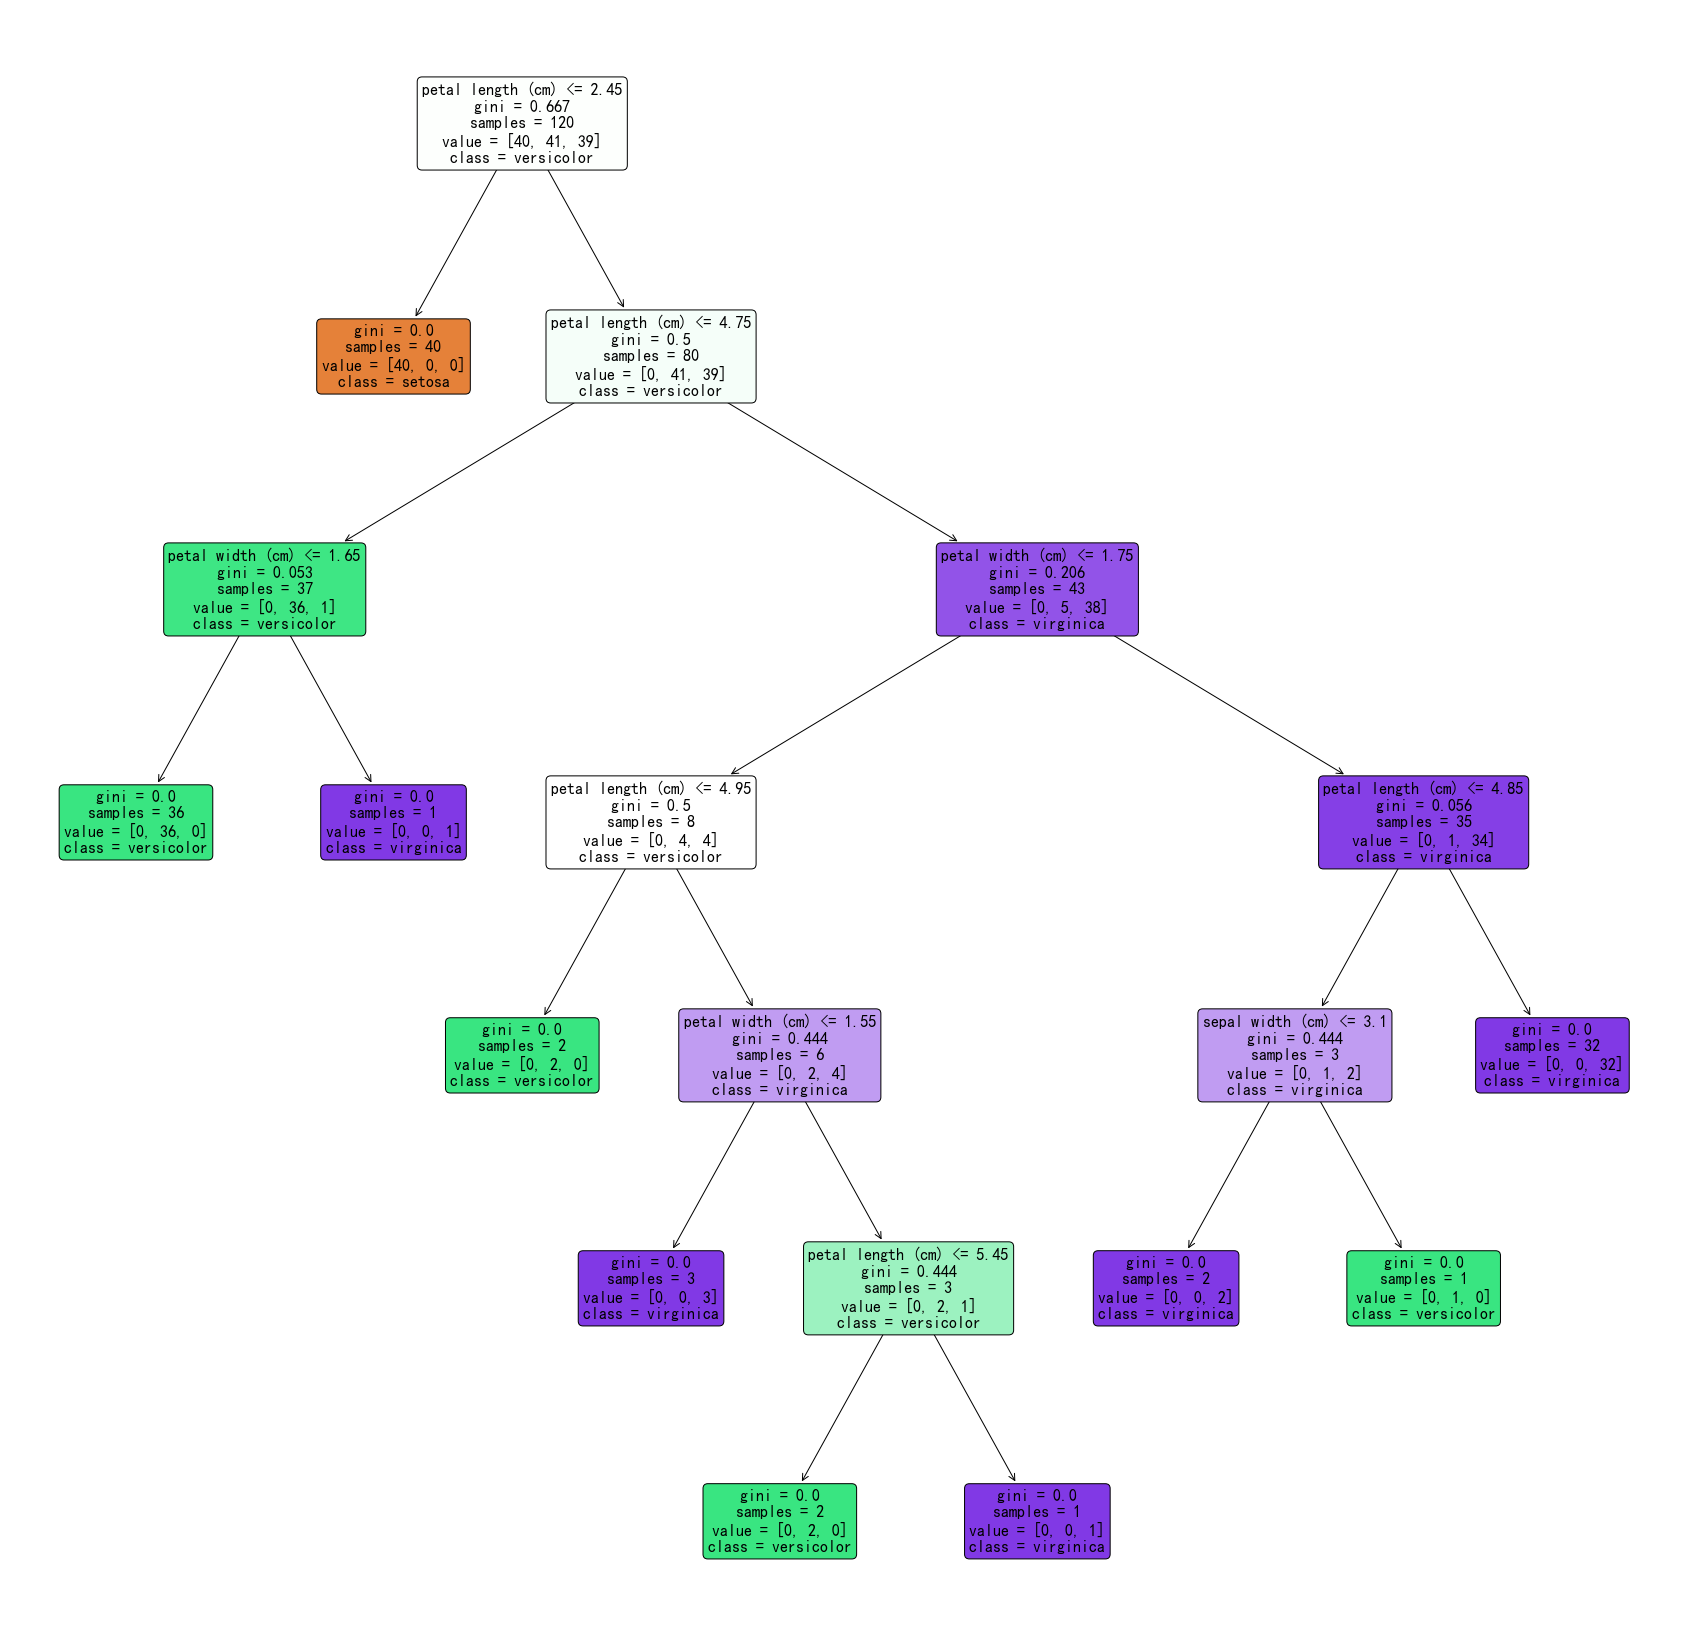

In [107]:
'''图示决策树'''
plt.figure(figsize=(30,30))
plot_tree(model,feature_names = X.columns,class_names = data.target_names,\
                   rounded = True,filled = True,fontsize=16)
plt.show()  

**<font color='purple'>强大的可视化dtreeviz</font>**

https://github.com/parrt/dtreeviz

https://www.cnblogs.com/jpld/p/15676100.html

谨慎参考：几种分类算法总结（有误 K均值是聚类算法，没有标签）
https://blog.csdn.net/qq_40016005/article/details/120598137

### 更多集成学习参考

音乐风格分类数据集：Music Genre Classification，包括以下属性：

- chroma_stft

Chroma features 是音乐音频的一种有趣而强大的表示，其中整个频谱被投射到 12 个 bins 上，代表音乐八度音阶的 12 个不同的半音（或色度）。

- rmse	

表征信号能量的方法，原始歌声的声学特征。

- spectral_centroid	

代表了声音的“质心”所在位置，与整个长度相同的布鲁斯风格歌曲相比，金属歌曲在结尾处有更高的频率，频谱频谱质心将接近其末端。

- spectral_bandwidth

音乐频谱带宽。

- rolloff	

信号形状的度量，表示每帧的滚降系数。即表示总频谱能量的百分比（例如 85%）低于该频率。

- zero_crossing_rate	

信号从正变为负或反向的速率，已大量用于语音识别和音乐信息检索。对于金属和摇滚中的高打击乐声音，它通常具有更高的值

- mfcc1-mfcc20	

Mel-Frequency Cepstral Coefficients - the way in which humans perceive sound（梅尔频率倒谱系数），一组特征，简明地描述了频谱包络的整体形状，可以模拟人声的特征。

- 目标变量是label

音乐风格类别标签（共10类）


In [1]:
import pandas as pd

music_categ = pd.read_csv('music_genre_dataset.csv')

music_categ.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,...,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,...,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


In [2]:
music_categ.isnull().sum()

filename              0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [3]:
music_categ.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.378669,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479170,99.552199,-8.921949,36.293061,...,-6.021121,4.471604,-4.797232,1.781547,-3.870276,1.147988,-3.967431,0.507303,-2.328779,-1.094875
std,0.081706,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235659,31.331904,21.695015,16.666986,...,6.819018,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561
min,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064026,-1.527147,-89.901138,-18.768461,...,-28.052265,-15.805225,-27.542309,-12.598773,-17.545473,-15.693589,-17.227766,-11.975698,-18.504187,-19.935202
25%,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695129,76.811485,-24.223789,24.107393,...,-10.966826,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194296,-2.003978,-4.670281,-3.367999
50%,0.383075,0.122448,2209.468780,2221.408983,4658.671830,0.099539,-120.206070,98.452553,-10.716073,36.957073,...,-5.920161,3.891842,-4.199810,1.879423,-3.614473,1.211945,-4.059109,0.669789,-2.391261,-1.155198
75%,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895018,119.893629,5.505793,48.212825,...,-1.004241,9.706133,-0.161017,5.155263,-0.323536,4.350694,-0.842968,3.112519,0.149070,1.303739
max,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034588,193.096512,56.666088,80.691277,...,17.421038,23.037573,13.054334,18.161661,12.357588,13.468802,11.489994,15.379257,14.686911,15.368967


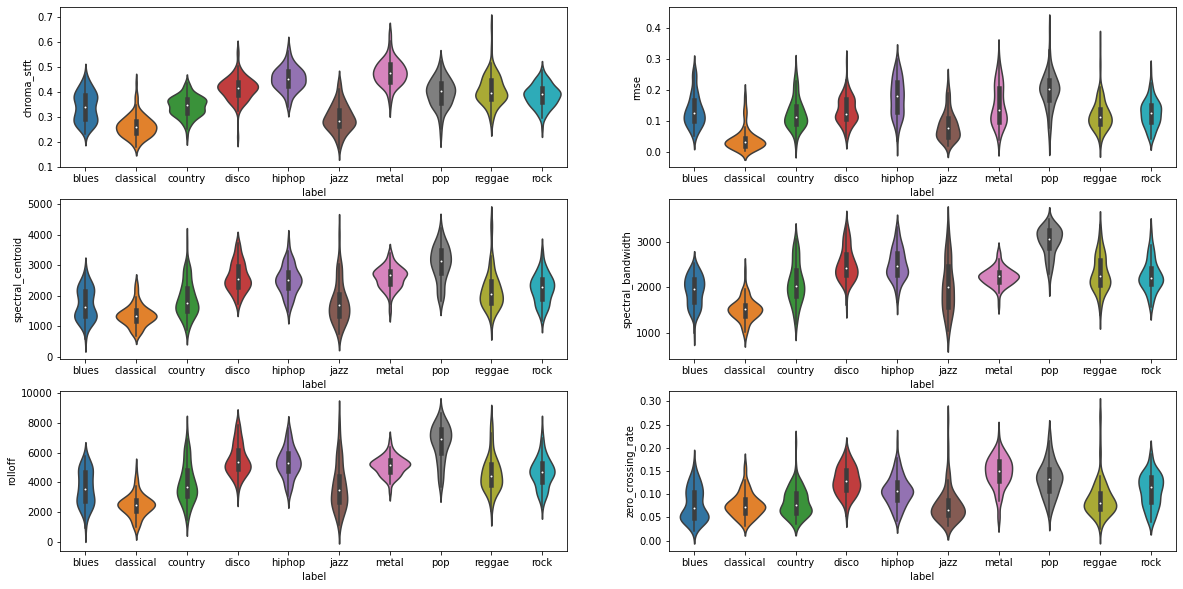

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(3, 2, figsize=(20,10))

#music_categ.columns[1:-1]
for i,col in enumerate(music_categ.columns[1:7]):
    plt.subplot(3, 2, i+1)
    sns.violinplot(data=music_categ, x='label', y=col)

In [5]:
music_categ.label.value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

music_categ_trans = music_categ
label_enc = LabelEncoder()
music_categ_trans['label']= label_enc.fit_transform(music_categ_trans.label)
music_categ_trans.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,0
1,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,...,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,0
2,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,0
3,blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,...,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,0
4,blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,0


In [7]:
sc = StandardScaler()
music_categ_trans.iloc[:,1:-1] = sc.fit_transform(music_categ_trans.iloc[:,1:-1])
music_categ_trans.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,-0.351748,-0.010723,-0.583303,-0.456037,-0.486166,-0.491967,0.308252,0.702674,-0.472090,...,0.646276,0.183186,0.792921,-0.265290,-0.086750,0.500287,-0.237191,0.007611,0.603498,0
1,blues.00001.wav,-0.461466,-0.533266,-0.939066,-0.387668,-0.649869,-1.138220,-0.629608,0.780890,0.823297,...,0.134824,0.414751,0.486404,-0.439656,-0.046294,0.714737,-0.055190,0.543824,0.424035,0
2,blues.00002.wav,-0.184484,0.680012,-0.907419,-0.941680,-0.972811,-0.653772,0.536253,1.306278,-0.931003,...,0.196257,-0.666035,-0.572254,-1.097722,0.285748,-0.826553,-0.600707,-0.294285,-0.295113,0
3,blues.00003.wav,0.319725,0.156317,-1.581483,-1.228392,-1.516328,-1.681950,-0.548502,1.614083,0.671898,...,0.240704,0.376277,-0.570291,0.204331,-0.080189,0.143018,0.033792,0.455308,-0.603122,0
4,blues.00004.wav,-0.858124,-0.599604,-0.511931,-0.939405,-0.629459,-0.051111,-0.157576,0.850888,-1.230552,...,-1.084009,-0.346457,-1.865428,-1.088525,-1.236700,-0.326734,-0.370160,-0.554268,-2.765875,0


In [8]:
from sklearn.model_selection import train_test_split
music_train_x,music_test_x,music_train_y,music_test_y = train_test_split(music_categ_trans.iloc[:,1:-1],music_categ_trans.label,test_size=0.2,random_state=66)
print(music_test_x.shape)
music_train_x.head()

(200, 26)


,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
537,-1.147796,-0.370013,-1.293169,-1.278293,-1.336525,-1.246590,-0.538756,1.314244,-0.438564,-0.346785,...,0.130679,-0.151599,0.317024,1.079136,0.731514,-0.691987,1.559993,0.092047,1.024950,0.224274
49,-1.239030,-0.644633,-1.234172,-0.642111,-0.968893,-1.522577,-1.112801,0.359904,1.403197,1.877593,...,-2.138039,-1.029875,-0.378355,-2.585482,-1.793752,0.348282,-1.095209,-2.184561,-0.004097,0.101487
559,-0.749857,0.789807,-1.124273,-0.202655,-1.041521,-1.563114,-0.348134,0.476718,1.711540,-0.018008,...,1.037599,-0.276024,0.170268,-0.414581,0.644873,0.309695,0.914629,0.270376,0.290982,0.651778
805,-0.171386,-0.464934,-0.563330,-0.529197,-0.492239,-0.731493,-0.321278,0.551621,-0.571653,0.147371,...,-0.591052,0.810021,0.251739,0.207037,0.275848,-0.559177,-1.301724,0.663360,0.545741,0.803305
813,-0.204432,-0.292763,-0.831780,-0.509577,-0.723593,-0.791516,-0.618629,0.737128,0.383638,-0.416395,...,-0.183086,0.388522,-0.897474,0.032638,-0.545264,-0.297064,-0.786054,-0.022150,0.178966,0.242623


### 补充 - lightgbm

In [9]:
from lightgbm import LGBMClassifier

from sklearn.metrics import f1_score,accuracy_score

lgbm_clf = LGBMClassifier()
lgbm_clf.fit(music_train_x,music_train_y)
lgbm_pred_music = lgbm_clf.predict(music_test_x)

lgbm_f1_music = f1_score(music_test_y,lgbm_pred_music,average='weighted')#多分类average=macro,micro或weighted
'''更多参考：https://zhuanlan.zhihu.com/p/147663370'''
print(lgbm_f1_music)
lgbm_acc_music = accuracy_score(music_test_y,lgbm_pred_music)
print(lgbm_acc_music)

0.6302947892610048
0.635


lightGBM更多调参请参考：https://zhuanlan.zhihu.com/p/418992334

lightGBM官网参考：https://lightgbm.readthedocs.io/

https://lightgbm.readthedocs.io/en/v3.3.2/Parameters-Tuning.html

### 补充：xgboost

In [10]:
from xgboost import plot_importance
from xgboost.sklearn import XGBClassifier

'''也可用原生xgboost分类器，构造DMatrix，设置参数，进行模型训练'''

xgb_clf = XGBClassifier(n_estimators = 500,
                        learning_rate = 0.1,
                        max_depth = 3,
                        min_child_weight = 1,
                        gamma = 0.1,
                        subsample = 0.8,
                        colsample_bytree = 0.8,
                        objective='multi:softmax',
                        seed=56
                       )
params_xgb = {'eval_metric':'mlogloss'}#multi-class log loss多分类性能指标,'early_stopping_rounds':500
xgb_clf.set_params(**params_xgb)
xgb_clf.fit(music_train_x,music_train_y)#eval_set=[(music_test_x,music_test_y)]

xgb_pred_music = xgb_clf.predict(music_test_x)
xgb_f1_music = f1_score(music_test_y,xgb_pred_music,average='weighted')#多分类average=macro,micro或weighted
print(xgb_f1_music)
xgb_acc_music = accuracy_score(music_test_y,xgb_pred_music)
print(xgb_acc_music)

0.6822901643759294
0.69


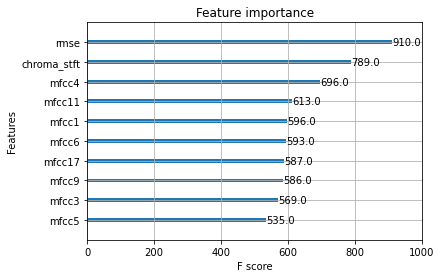

In [11]:
plot_importance(xgb_clf,max_num_features=10)
plt.show()

xgboost更多调参请参考：https://xgboost.apachecn.org/#/docs/8

https://xgboost.readthedocs.io/en/stable/tutorials/param_tuning.html

![](xgboost.png)

![](lightgbm.png)